# Summary

Credit card segmentation is a valuable data-driven technique used by financial institutions to categorize credit cardholders into distinct groups based on various criteria such as spending behavior, demographics, and credit utilization. This approach offers several benefits for credit card management. 

Firstly, it allows for personalized marketing efforts by tailoring campaigns, promotions, and product offerings to specific customer segments. This results in more relevant and appealing strategies, enhancing customer engagement and satisfaction.Credit card segmentation also aids in risk assessment by analyzing factors like payment history and credit scores within each segment. This helps financial institutions make informed decisions regarding credit limits and loan approvals, ensuring responsible lending practices.

As part of this project,we will extract segments of customers depending on their behaviour patterns provided in the dataset, to focus marketing strategy of the company on a particular segment.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings('ignore')

# Load & Understand Data

In [3]:
data = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In [4]:
data.shape

(8950, 18)

In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


**Observations**
1. We will exclude CUST_ID from customer segmentation analysis as it is a unique id for each customer.
2. CREDIT_LIMIT and MINIMUM_PAYMENTS contain null values.
3. The dataset only contains numerical values.
4. The analysis reveals a noticeable difference between the mean and median values for most features. This suggests potential skewness in the dataset, requiring further investigation and possible corrective measures.

# Data Preprocessing

### Handle Missing Values

In [8]:
#Check for null values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
data[data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


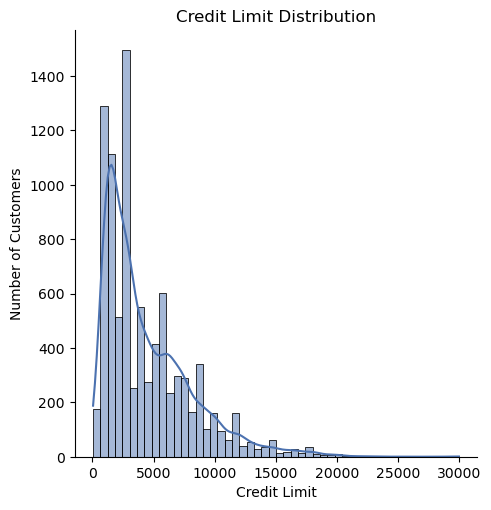

In [10]:
#Plot
sns.set_palette("deep")

sns.displot(data=data, x='CREDIT_LIMIT', kde=True, bins=50)
    
plt.xlabel('Credit Limit')
plt.ylabel('Number of Customers')
plt.title('Credit Limit Distribution')

plt.show()

Due to the right-skewed distribution of the data, it is better to fill the missing values with the median instead of the mean.

In [11]:
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median())

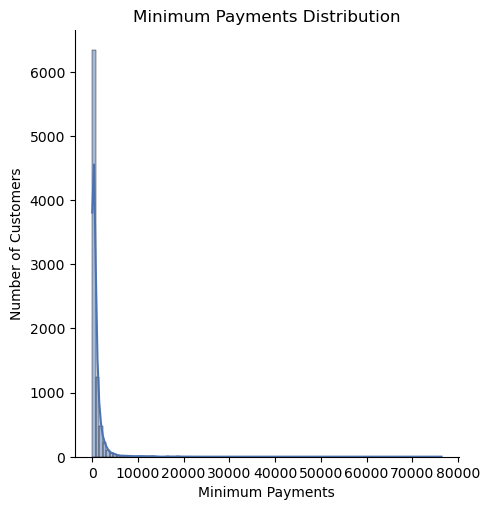

In [12]:
#Plot
palette = "deep" 
sns.set_palette(palette)

sns.displot(data=data, x='MINIMUM_PAYMENTS', kde=True, bins=100)
    
plt.xlabel('Minimum Payments')
plt.ylabel('Number of Customers')
plt.title('Minimum Payments Distribution')

plt.show()

As the data is right skewed, it's better to fill the missing value with median instead of mean

In [13]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [14]:
#Check no null values are present
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Drop Column

In [15]:
#Drop CUST_ID column
print("Before dropping customer Id column",data.shape)
data.drop('CUST_ID',inplace=True,axis=1)
print("After dropping customer Id column",data.shape)

Before dropping customer Id column (8950, 18)
After dropping customer Id column (8950, 17)


### Data Visualisation

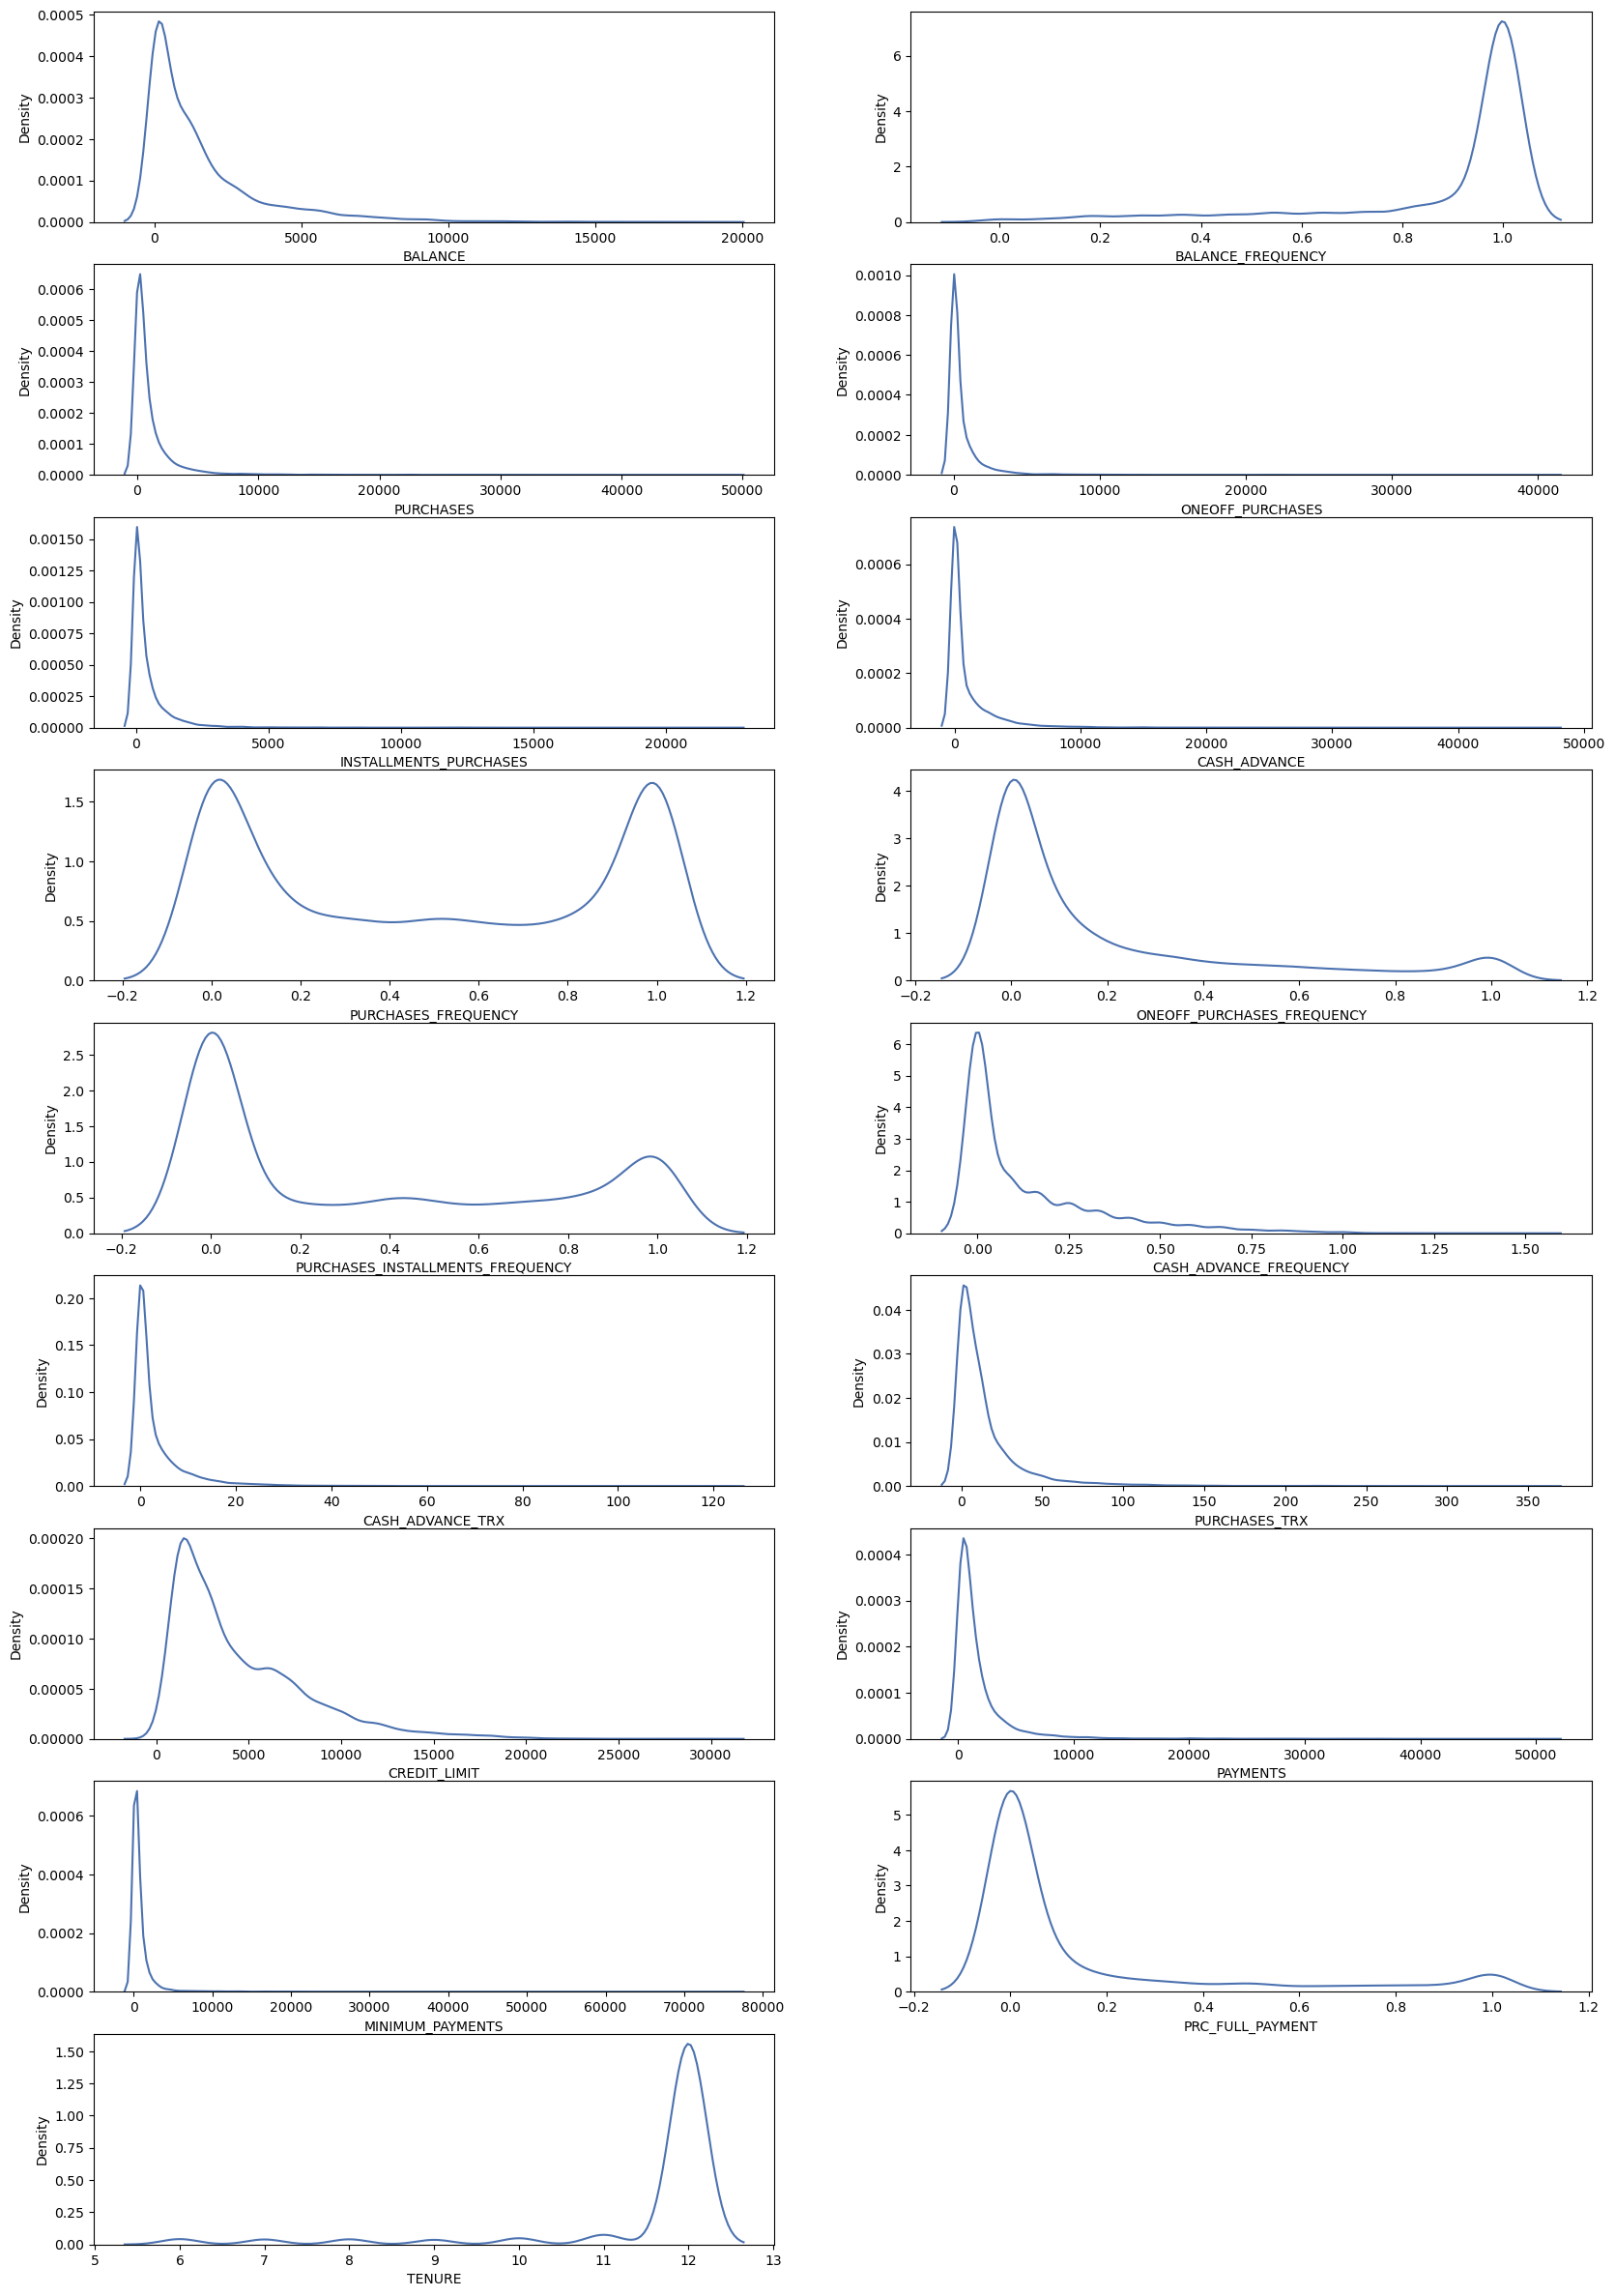

In [16]:
plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

The presence of skewness in our data is not surprising, as it is expected that there will be a small number of customers who make a significant number of purchases, while the majority of customers make fewer purchases.

### Handle Skweness

To mitigate the skewness in the data, we can employ a logarithmic transformation. This transformation compresses the range of higher values more than the range of lower values, leading to increased symmetry and reduced skewness. It is particularly effective for positively skewed distributions, where the tail extends towards higher values. To implement this approach, we will identify columns that exhibit positive skewness and then apply the logarithmic transformation to those columns.

In [17]:
positively_skewed_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [18]:
df = data.copy()
for col in positively_skewed_cols:
    df[col] = np.log(1 + df[col])

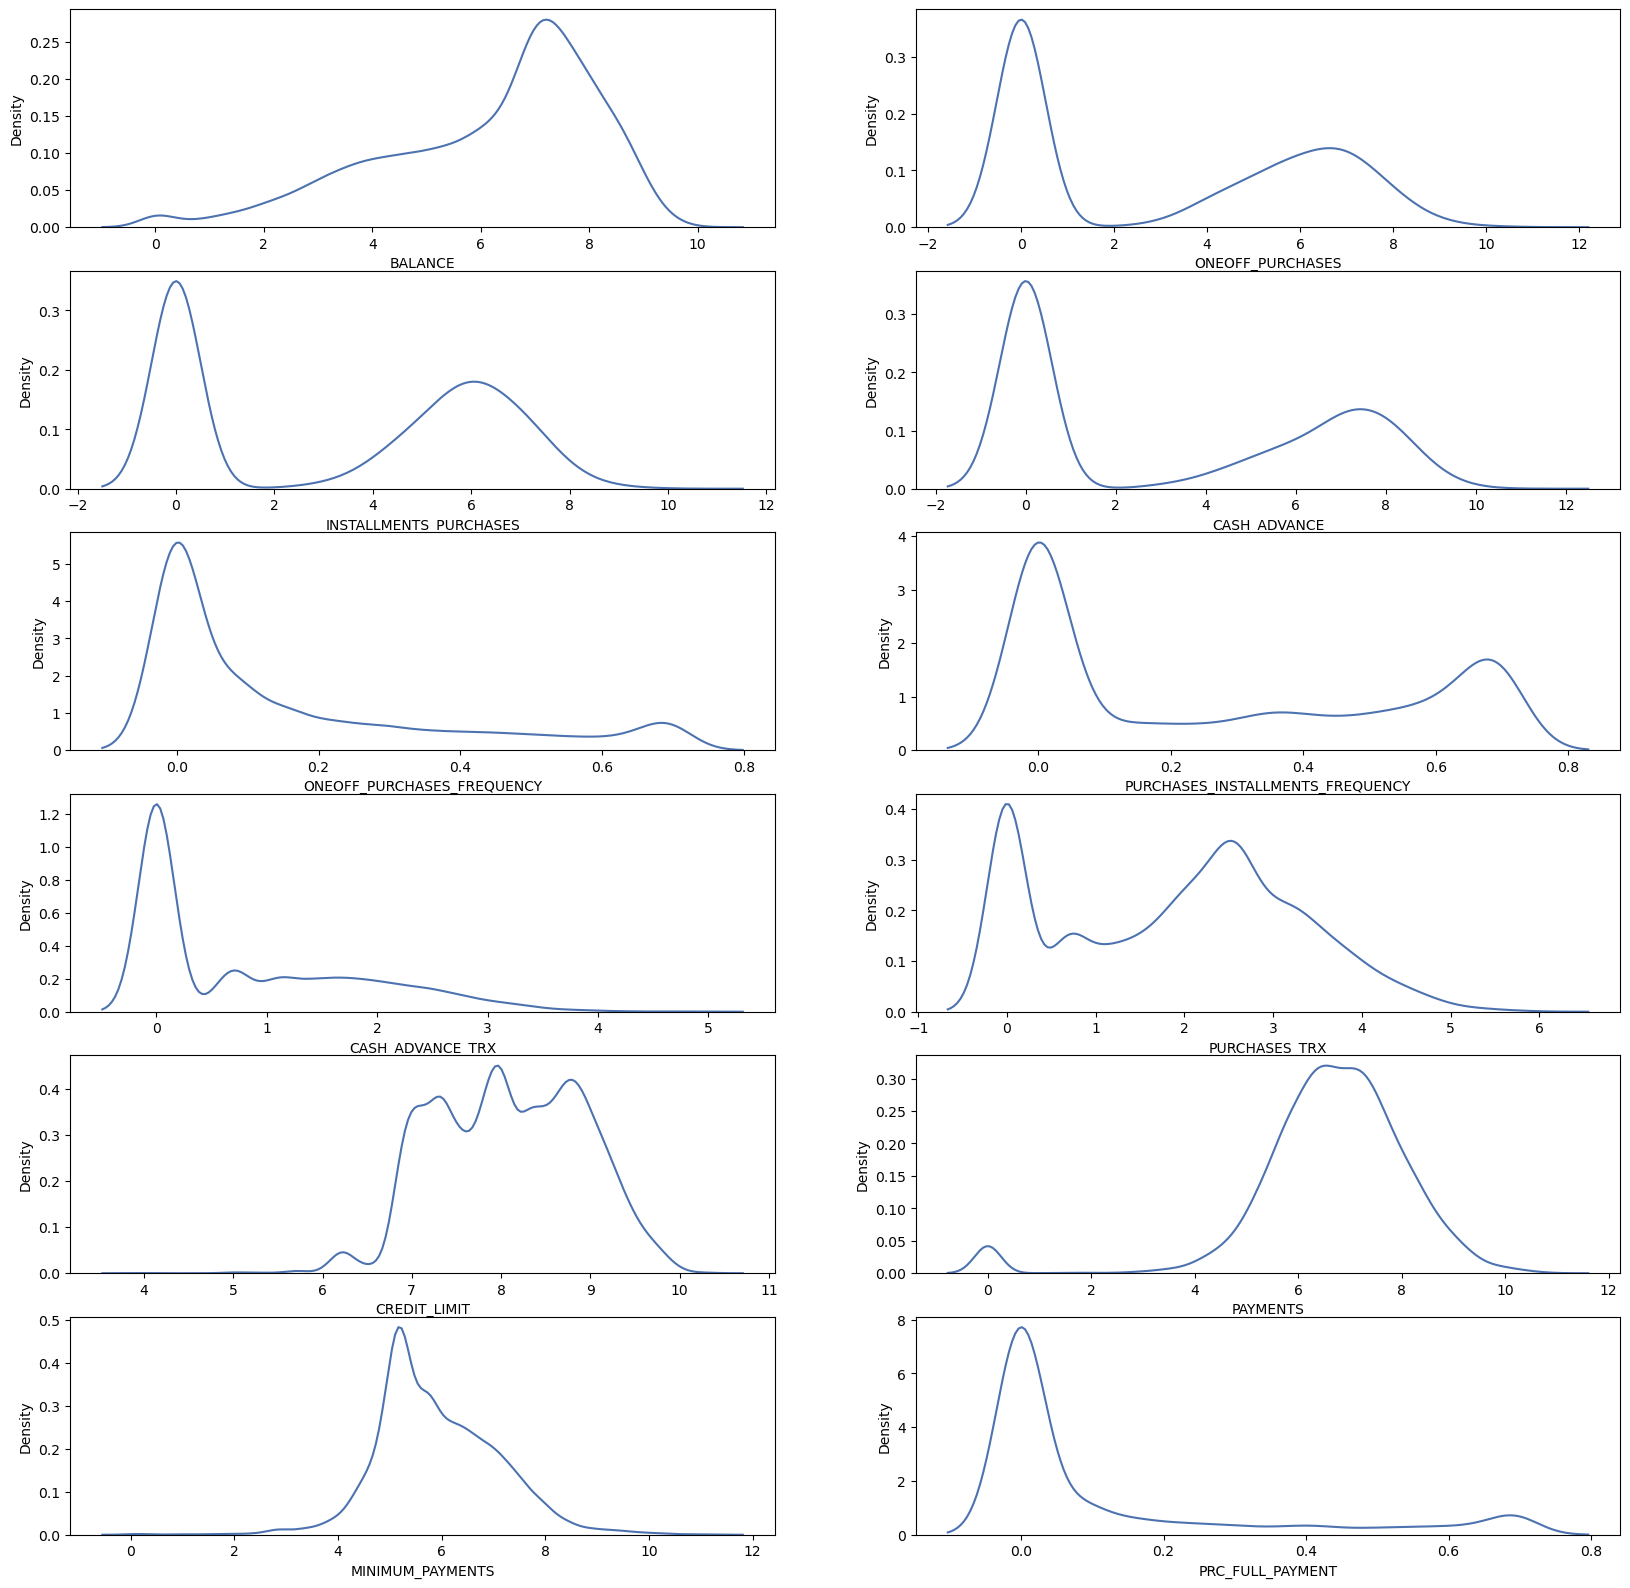

In [19]:
plt.figure(figsize=(20,30))
for i, col in enumerate(positively_skewed_cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
plt.show()

While the distribution may not appear to be ideal, the transformation we applied has improved it compared to the original state.

### Correlations

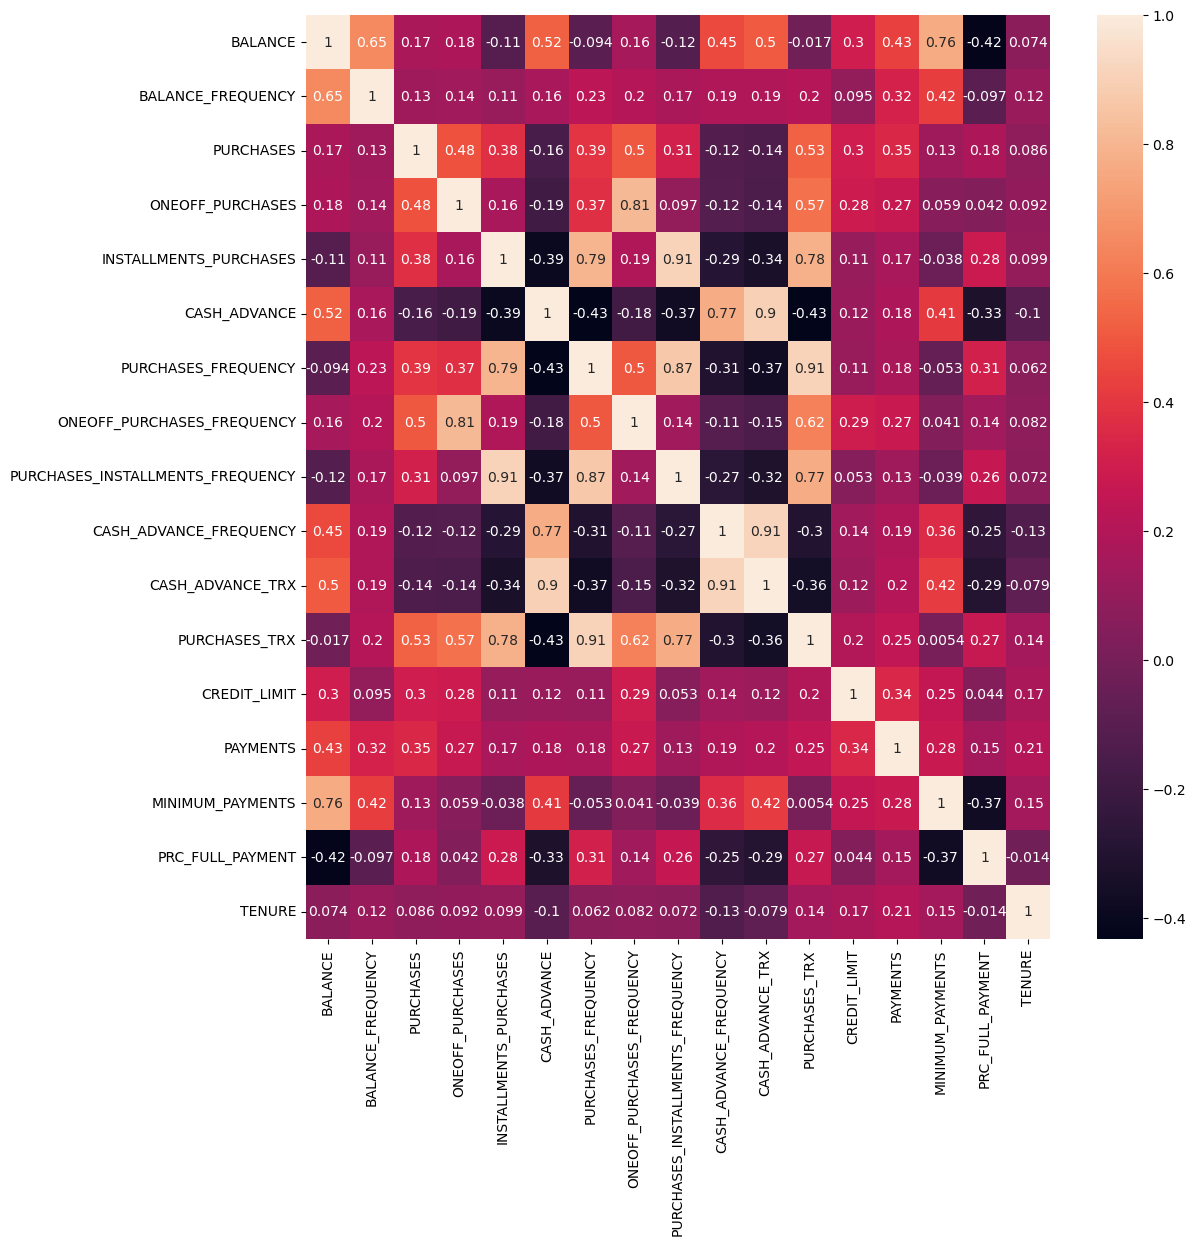

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Given the presence of correlated features in the dataset, it is necessary to tackle this issue. To address it, we will employ dimensionality reduction techniques. By reducing the dimensionality of the data, we can mitigate the impact of correlated features while retaining the critical information necessary for analysis and modeling.

### Dimensionality Reduction

In [21]:
#Apply PCA such that 95% variance is explained by PCA components
pca = PCA(n_components=0.95)
X = pca.fit_transform(df)

# Modeling

In [22]:
n_clusters=15
inertia=[]
for i in range(1,n_clusters):
    kmean= KMeans(n_clusters=i,random_state=23)
    kmean.fit(X)
    inertia.append(kmean.inertia_)  

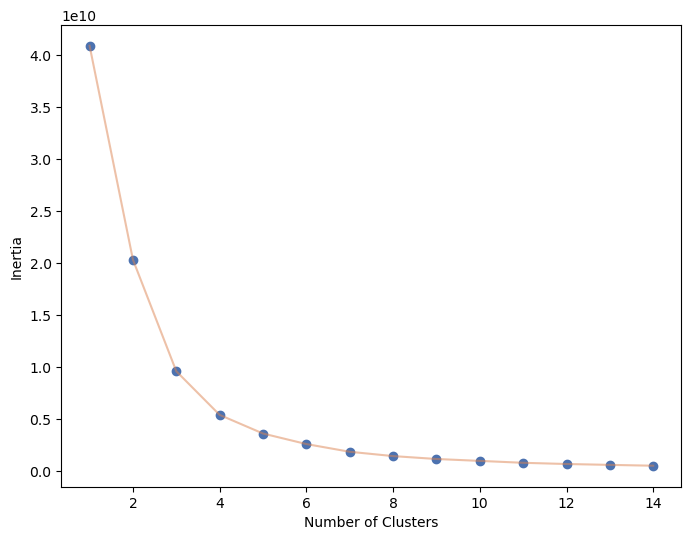

In [23]:
plt.figure(1 , figsize = (8 ,6))
plt.plot(np.arange(1 , n_clusters) , inertia , 'o')
plt.plot(np.arange(1 , n_clusters) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

It seems elbow is around 4. Let's create clusters using n=4. 

In [24]:
kmean= KMeans(n_clusters=4)
kmean.fit(X)
labels=kmean.labels_

In [25]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


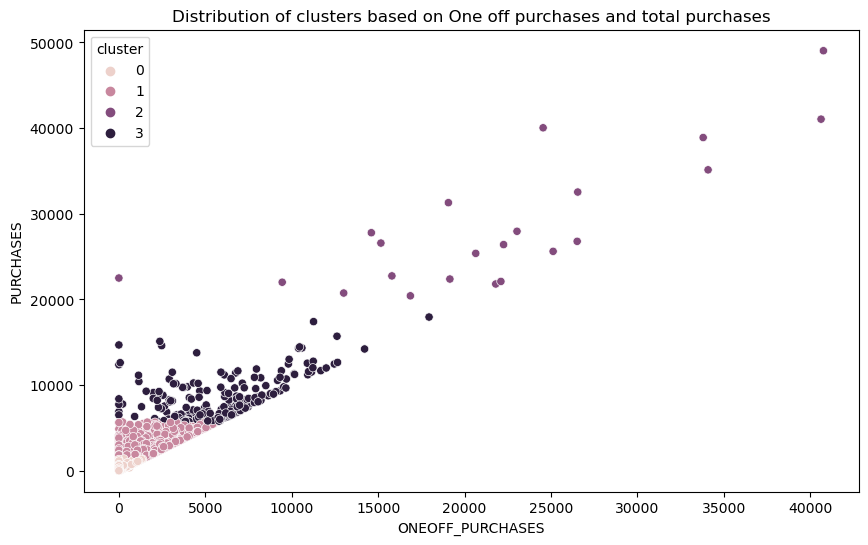

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=clusters, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

# Conclusion


By segmenting the data into four clusters, we have effectively categorized the dataset based on distinct characteristics or patterns. These segments can provide valuable insights for formulating targeted marketing strategies. Since each segment exhibits different purchase capacities, understanding these variations allows for tailored approaches to maximize effectiveness and meet the unique needs of each customer group.